<a href="https://colab.research.google.com/github/agmgaffar123/-plotly.github.io/blob/master/FP_QTA_AHT_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***QTA AHT Analysis***

The aim of this exercise is to understand the current AHT and the factors that influence.

Through this exercise, we aim to perform following hypothesis testing.
a. Existence and the impact of outliers 
1. Does AHT vary between market category significantly?
2. Does AHT vary between type significantly?
3. Does AHT vary between mfg sites significantly?
4. Does AHT vary based on the service level?
5. Does AHT vary based on the day the job is recieved?
6. Is there a relationship between page count and AHT?


In [ ]:
#Importing required libraries
import numpy as np   
import gspread
from gspread_dataframe import get_as_dataframe,set_with_dataframe
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm

import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [ ]:
#Importing the data file
!pip install --upgrade gspread
!pip install gspread-dataframe
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
ws = gc.open('QTA Turn time (5 min) Summary v1').sheet1
df=get_as_dataframe(ws)

In [ ]:
ws = gc.open('QTA Turn time (5 min) Summary v1').sheet1
df=get_as_dataframe(ws)


### **1.Overview** 

In [ ]:
df.shape

(1032, 13)

In [ ]:
#Overview of the data file
df.head(2)

,Summary_Code,Service_Level,MC,Type,WorkType,Start time,AHT,Pages,Turn_Time (Num),Segment,Day,Splits,Time
0,10176_4,QTA,GIM,Edgar,Alts,9/19/2020 2:27,147.6,1,2.46,Domestic,6,8,2 AM
1,10176_4,QTA,GIM,Edgar,Alts,9/19/2020 2:37,9.0,15,2.30,Domestic,6,8,2 AM


In [ ]:
df['Day'] = df['Day'].astype(object)
df['Turn_Time (Num)'] = df['Turn_Time (Num)'].astype(object)
df['Type'] = df['Type'].astype(object)



In [ ]:
#AHT summary

df.describe(	).round(1)

,AHT,Pages,Splits
count,1032.0,1032.0,1032.0
mean,27.7,8.5,18.6
std,47.5,25.4,15.1
min,0.0,1.0,1.0
25%,3.6,1.0,7.0
50%,11.4,2.0,14.0
75%,28.2,6.0,23.0
max,382.2,349.0,51.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


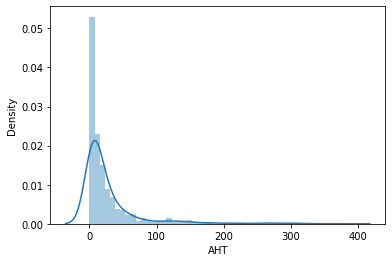

In [ ]:
#Cycle time distribution
sns.distplot(df['AHT'])

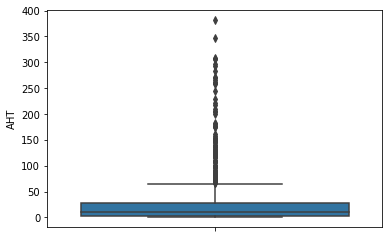

In [ ]:
#Box plot chart of cycle time
sns.boxplot(y="AHT", data=df)

As shown in the above graphs, it is evident that outliers largely impacts the average cycle time

Outlier Identification

In [ ]:

#Outlier Identification of cycle time
q1=df.AHT.quantile(0.25)
q3=df.AHT.quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
upper_limit

65.10000000000001

Cycle time above 1.085 hours to be considered as outliers

### **2.Does cycle time vary between market category significantly?**


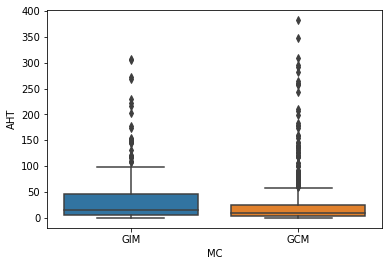

In [ ]:
#box plot by site
sns.boxplot(x="MC", y="AHT", data=df)

In [ ]:
df.groupby('MC').describe().round(1)

AHT                              ... Splits                            
     count  mean   std  min  25%   50%  ...    std  min  25%   50%   75%   max
MC                                      ...                                   
GCM  849.0  24.7  43.7  0.0  3.6  10.2  ...   16.1  1.0  7.0  15.0  35.0  51.0
GIM  183.0  41.5  60.6  0.0  5.4  16.2  ...    6.4  1.0  8.0  12.0  17.0  23.0

[2 rows x 24 columns]

In [ ]:
#1. Does cycle time vary between Market Category significantly?
import statsmodels.api as sm
from   statsmodels.formula.api import ols
mod = ols('AHT ~ MC', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
 


                sum_sq      df          F    PR(>F)
MC        4.249757e+04     1.0  19.154941  0.000013
Residual  2.285181e+06  1030.0        NaN       NaN


As the P value is above 0.05, we could conclude that market category does not impact AHT 

### **3.Does AHT vary by Work-Type significantly?**


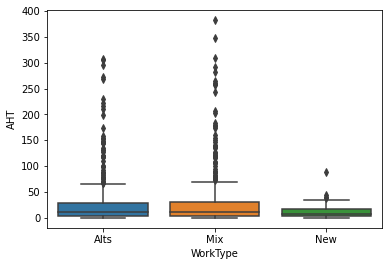

In [ ]:
#box plot by Type
sns.boxplot(x="WorkType", y="AHT", data=df)

In [ ]:
df.groupby('WorkType').describe().round(1)

AHT                              ... Splits                            
          count  mean   std  min  25%   50%  ...    std  min  25%   50%   75%   max
WorkType                                     ...                                   
Alts      612.0  25.4  41.1  0.0  4.2  11.7  ...   17.0  1.0  8.0  18.0  40.0  51.0
Mix       363.0  33.8  58.9  0.0  3.6  11.4  ...   10.1  1.0  7.0  12.0  16.0  38.0
New        57.0  13.1  15.0  0.0  3.6   8.4  ...    5.0  1.0  2.0   8.0  10.0  14.0

[3 rows x 24 columns]

In [ ]:
#1. Does cycle time vary between Market Category significantly?
import statsmodels.api as sm
from   statsmodels.formula.api import ols
mod = ols('AHT ~ WorkType', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
 


                sum_sq      df         F    PR(>F)
WorkType  2.882500e+04     2.0  6.451243  0.001643
Residual  2.298853e+06  1029.0       NaN       NaN


As the P value is below 0.05, we could conclude that type does impact AHT 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Alts    Mix   8.3629  0.021   1.0133 15.7124   True
  Alts    New -12.3574 0.1427 -27.7209   3.006  False
   Mix    New -20.7203 0.0061 -36.5263 -4.9143   True
-----------------------------------------------------


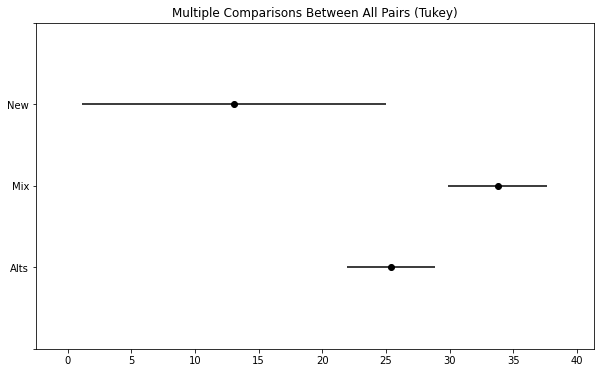

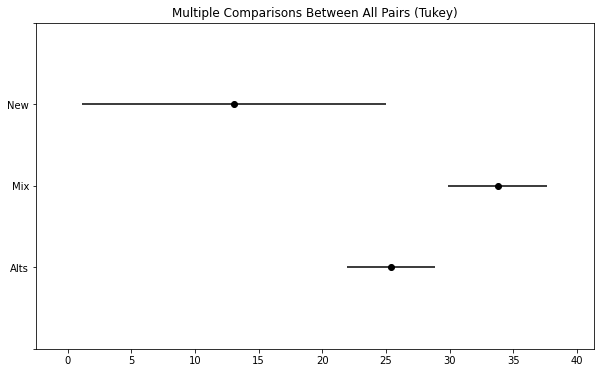

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeyType=pairwise_tukeyhsd(df['AHT'], df['WorkType'])
print(tukeyType)
results1=tukeyType
results1.plot_simultaneous()

### **4. Does cycle time vary based on the day the job is recieved?**


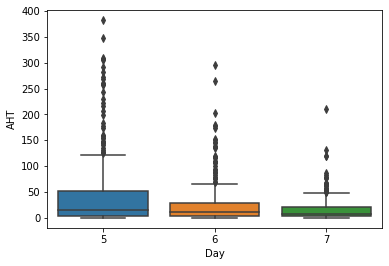

In [ ]:
#box plot by weekday
sns.boxplot(x="Day", y="AHT", data=df)

In [ ]:
daynmean=df.groupby('Day').describe().round(1)
print(daynmean)

       AHT                              ... Splits                            
     count  mean   std  min  25%   50%  ...    std  min  25%   50%   75%   max
Day                                     ...                                   
5    282.0  46.6  71.9  0.0  4.2  15.9  ...   12.9  1.0  7.0  15.5  22.8  51.0
6    402.0  24.5  37.3  0.0  4.2  11.4  ...   15.9  1.0  8.0  15.0  35.0  51.0
7    348.0  16.1  21.8  0.0  3.6   8.4  ...   15.7  1.0  6.0  11.0  38.0  49.0

[3 rows x 24 columns]


In [ ]:
#Does cycle time siginificanly differ between weekdays?
import statsmodels.api as sm
from   statsmodels.formula.api import ols
mod = ols('AHT ~ Day', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
 

                sum_sq      df          F        PR(>F)
Day       1.514368e+05     2.0  35.802201  9.298965e-16
Residual  2.176241e+06  1029.0        NaN           NaN


As the P value is below 0.05, we could conclude that weekdays at which the job is recieved is a significant factor for cycle time

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     5      6 -22.0945  0.001  -30.479   -13.71   True
     5      7  -30.472  0.001 -39.1206 -21.8235   True
     6      7  -8.3775 0.0347 -16.2809  -0.4741   True
------------------------------------------------------


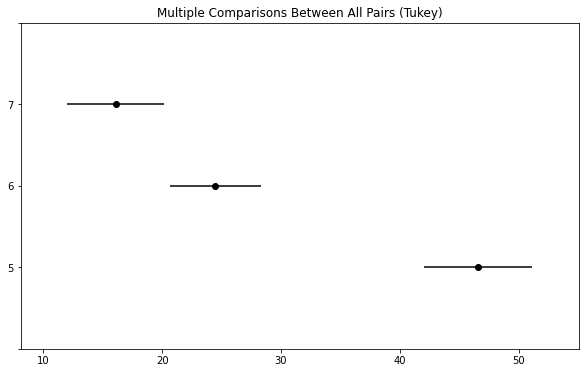

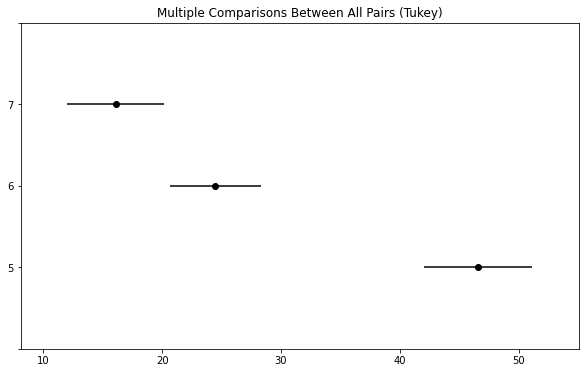

In [ ]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeyweekday=pairwise_tukeyhsd(df['AHT'], df['Day'])
print(tukeyweekday)
results1=tukeyweekday
results1.plot_simultaneous()



### **5. Does cycle time vary based on the time the job is recieved?**


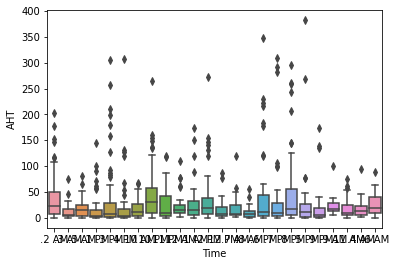

In [ ]:
#box plot by weekday
sns.boxplot(x="Time", y="AHT", data=df)

In [ ]:
Timenmean=df.groupby('Time').describe().round(1)
print(Timenmean)

         AHT                               ... Splits                             
       count  mean   std  min   25%   50%  ...    std  min   25%   50%   75%   max
Time                                       ...                                    
.1 AM   41.0  28.0  39.0  0.0   5.4  15.0  ...   13.9  1.0  14.0  17.0  33.0  51.0
.1 PM   69.0  14.9  26.2  0.0   2.4   4.2  ...   13.4  1.0   7.0  11.0  19.0  49.0
.10 AM  37.0  17.2  17.8  0.6   4.2  12.0  ...   11.8  1.0   3.0   7.0  15.0  46.0
.10 PM  52.0  45.0  52.5  0.6  10.0  30.3  ...   17.7  2.0   8.0  14.0  38.0  49.0
.11 AM  29.0  20.1  21.8  0.6   4.8   9.0  ...   15.7  1.0   4.0   8.0  11.0  49.0
.11 PM  57.0  23.6  29.3  0.0   3.6   9.0  ...   14.5  1.0   8.0  13.0  35.0  51.0
.12 AM  34.0  23.8  25.2  1.2   8.6  15.6  ...   14.1  1.0   8.8  13.5  17.0  51.0
.12 PM  53.0  14.1  17.5  0.0   3.0   7.8  ...    7.9  1.0   4.0   8.0  15.0  40.0
.2 AM   58.0  39.4  47.1  0.0   8.0  22.8  ...   14.7  1.0   9.0  12.0  20.0  51.0
.2 P

In [ ]:
#Does cycle time siginificanly differ between weekdays?
import statsmodels.api as sm
from   statsmodels.formula.api import ols
mod = ols('AHT ~ Time', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
 

                sum_sq      df         F   PR(>F)
Time      1.414649e+05    23.0  2.835888  0.00001
Residual  2.186213e+06  1008.0       NaN      NaN


As the P value is below 0.05, we could conclude that weekdays at which the job is recieved is a significant factor for cycle time

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 .1 AM  .1 PM  -13.018    0.9 -46.5154 20.4793  False
 .1 AM .10 AM -10.8091    0.9  -49.329 27.7108  False
 .1 AM .10 PM  17.0457    0.9 -18.4339 52.5253  False
 .1 AM .11 AM  -7.8969    0.9 -49.1151 33.3213  False
 .1 AM .11 PM   -4.408    0.9 -39.1947 30.3788  False
 .1 AM .12 AM  -4.2129    0.9  -43.616 35.1901  False
 .1 AM .12 PM -13.8376    0.9 -49.1693 21.4942  False
 .1 AM  .2 AM  11.4686    0.9 -23.1925 46.1297  False
 .1 AM  .2 PM   7.0477    0.9 -27.4915 41.5869  False
 .1 AM  .3 AM -15.5295    0.9 -52.4036 21.3446  False
 .1 AM  .3 PM   5.2725    0.9  -27.881  38.426  False
 .1 AM  .4 AM  -9.8587    0.9 -51.5058 31.7883  False
 .1 AM  .4 PM  -5.7992    0.9 -40.9879 29.3895  False
 .1 AM  .5 AM  -9.7505    0.9 -47.7476 28.2467  False
 .1 AM  .5 PM   1.1533    0.9 -35.1487 37.4553  False
 .1 AM  .6 AM  -1.6409    0.

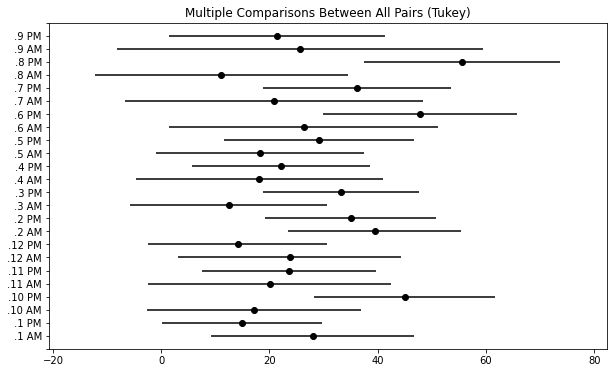

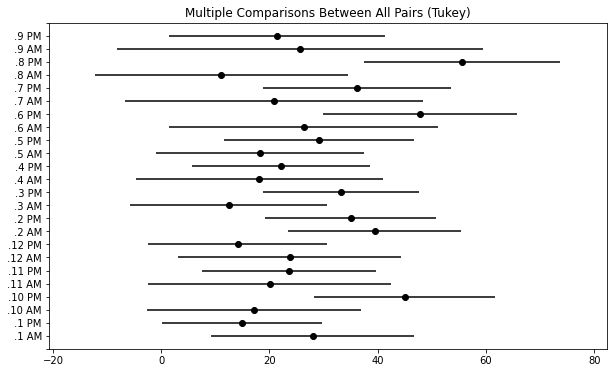

In [ ]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeyweekday=pairwise_tukeyhsd(df['AHT'], df['Time'])
print(tukeyweekday)
results1=tukeyweekday
results1.plot_simultaneous()



### **6. Does cycle time vary based on page count (page size of three?**


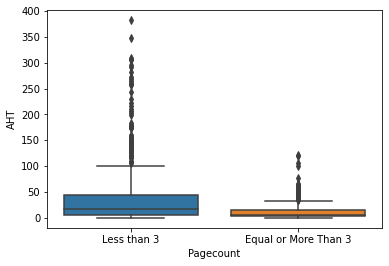

In [ ]:
#box plot by weekday
sns.boxplot(x="Pagecount", y="AHT", data=df)

In [ ]:
Timenmean=df.groupby('Pagecount').describe().round(1)
print(Timenmean)

                        AHT                        ... Splits                    
                      count  mean   std  min  25%  ...    min  25%  50%  75%  max
Pagecount                                          ...                           
Equal or More Than 3  472.0  12.5  16.2  0.0  3.0  ...    1.0  1.0  1.0  3.0  5.0
Less than 3           560.0  40.5  59.9  0.0  5.8  ...    1.0  1.0  1.0  3.0  5.0

[2 rows x 40 columns]


In [ ]:
#Does cycle time siginificanly differ between weekdays?
import statsmodels.api as sm
from   statsmodels.formula.api import ols
mod = ols('AHT ~ Pagecount', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
 

                 sum_sq      df          F        PR(>F)
Pagecount  2.007409e+05     1.0  97.211671  5.643644e-22
Residual   2.126937e+06  1030.0        NaN           NaN


### **7. Is there a relationship between AHT and page count?**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


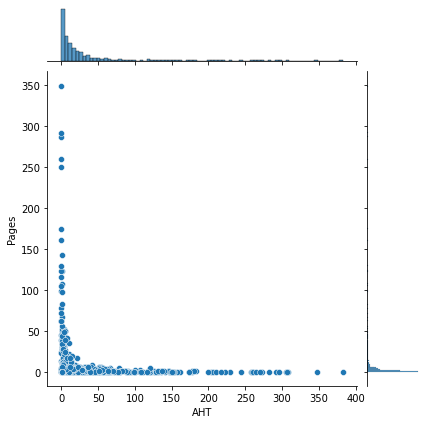

In [ ]:
#AHT and page count
sns.jointplot(df['AHT'], df['Pages'])



In [ ]:
df[['AHT','Pages']].corr()

,AHT,Pages
AHT,1.000000,-0.143037
Pages,-0.143037,1.000000


Cycle number does not impact cycle time

### **8. Is there a relationship between AHT and no of splits?**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


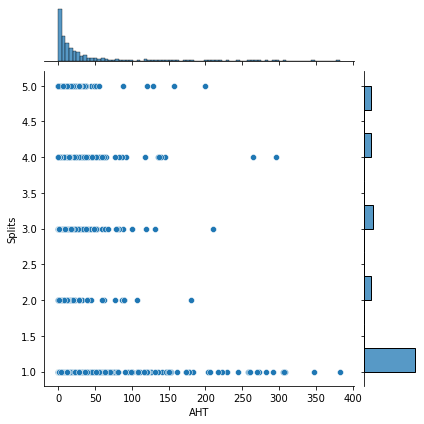

In [ ]:
#AHT and page count
sns.jointplot(df['AHT'], df['Splits'])



In [ ]:
df[['AHT','Splits']].corr()

,AHT,Splits
AHT,1.000000,-0.019896
Splits,-0.019896,1.000000


Cycle number does not impact cycle time

### **Thank You**